## 1) Image properties

In [213]:
from Lab3.image import Image
from Lab3.image import ImageProperties

In [214]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [236]:
img = Image('./Images/Sample.jpeg')
ImageProperties.summary(img)

{'filename': './Images/Sample.jpeg',
 'image_tensor shape': (183, 275, 3),
 'brightness': 70.40704752442457,
 'contrast': 58.03163735644668,
 'range': (0, 255),
 'aspect_ratio': (183, 275),
 'std_deviation': 58.03163735644668,
 'skewness': 0.9491227519952067}

In [237]:
img.data[0][0]

array([68, 49,  0], dtype=uint8)

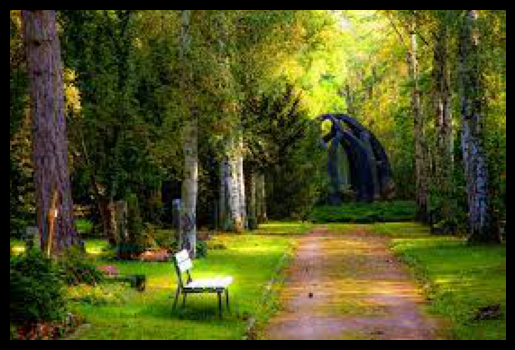

In [238]:
img.display()

## 2) Filters

In [239]:
from Lab3.image import ImageFilters

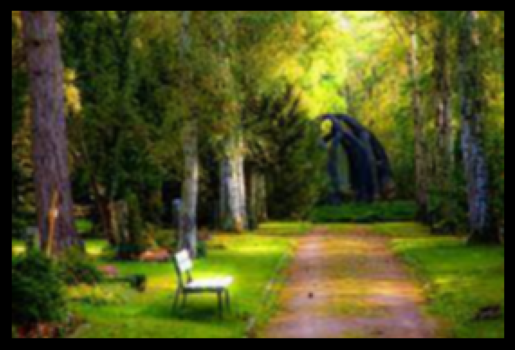

In [240]:
ImageFilters.gaussian_blur(img).display()

In [241]:
imgx,imgy = ImageFilters.edge_detection(img)

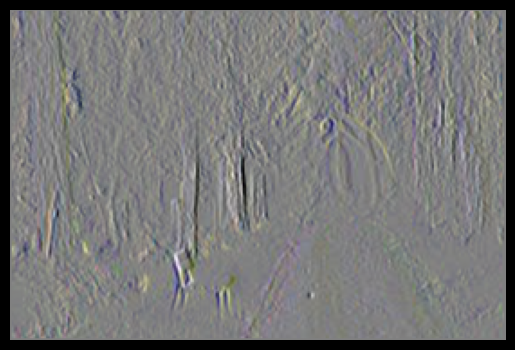

In [242]:
imgx.display()

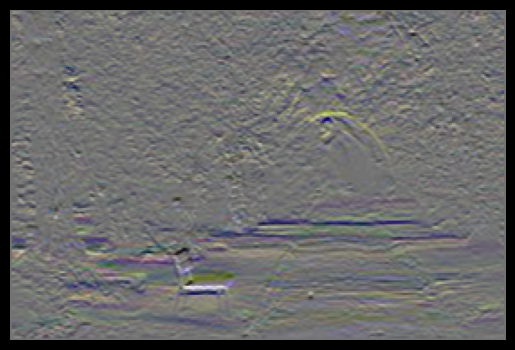

In [243]:
imgy.display()

In [244]:
imgl = ImageFilters.laplacian(img)

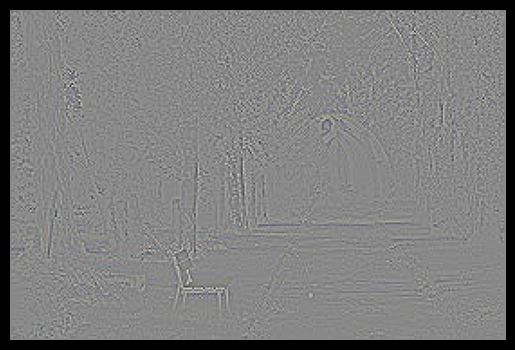

In [245]:
imgl.display()